In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Data preparation

In [361]:
df = pd.read_csv("data/Dry_Eye_Dataset.csv")

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

In [363]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


In [364]:
# Converting categorical values into numerical formats
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1}).astype(int)

binary_columns = [
    "Sleep disorder", "Wake up during night", "Feel sleepy during day",
    "Caffeine consumption", "Alcohol consumption", "Smoking", 
    "Medical issue", "Ongoing medication", "Smart device before bed", 
    "Blue-light filter", "Discomfort Eye-strain", "Redness in eye", 
    "Itchiness/Irritation in eye", "Dry Eye Disease"]
df[binary_columns] = (df[binary_columns] == 'Y').astype(int)

df[['Systolic BP', 'Diastolic BP']] = df['Blood pressure'].str.split('/', expand=True).astype(int)

df.drop(columns=['Blood pressure'], inplace=True)



In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  int32  
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Heart rate                   20000 non-null  int64  
 6   Daily steps                  20000 non-null  int64  
 7   Physical activity            20000 non-null  int64  
 8   Height                       20000 non-null  int64  
 9   Weight                       20000 non-null  int64  
 10  Sleep disorder               20000 non-null  int32  
 11  Wake up during night         20000 non-null  int32  
 12  Feel sleepy during day       20000 non-null  int32  
 13  Caffeine consump

In [366]:
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP
0,0,24,9.5,2,1,67,3000,31,161,69,...,1,0,8.7,0,1,1,0,1,137,89
1,1,39,9.6,2,3,60,12000,74,164,87,...,1,0,9.6,1,0,0,1,1,108,64
2,0,45,5.4,1,5,95,12000,93,179,94,...,0,1,4.0,0,1,0,0,0,134,81
3,0,45,5.4,4,5,78,19000,32,160,77,...,0,0,7.6,0,1,0,1,0,110,90
4,0,42,5.7,3,2,72,4000,173,179,99,...,0,0,3.5,0,1,1,0,1,99,67


In [367]:
df.corr()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,...,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease,Systolic BP,Diastolic BP
Gender,1.000000,-0.007612,-0.014073,-0.005695,-0.006703,-0.000208,-0.000505,-0.000253,0.006942,-0.001585,...,0.005377,-0.001701,-0.018310,0.009805,-0.010110,0.007337,-0.000282,-0.016321,0.000536,0.006006
Age,-0.007612,1.000000,0.004857,0.002513,0.008379,-0.001196,0.001302,-0.009191,-0.005171,0.003908,...,0.007507,0.003810,0.003177,-0.002508,-0.001069,-0.010335,0.009893,0.005258,0.018157,-0.016013
Sleep duration,-0.014073,0.004857,1.000000,-0.006892,-0.006088,-0.029175,0.002823,0.001858,0.005259,0.000222,...,-0.000208,-0.003081,-0.004208,0.002034,0.006544,0.004315,-0.007170,-0.000874,-0.000939,-0.000648
Sleep quality,-0.005695,0.002513,-0.006892,1.000000,0.000721,-0.014326,-0.003074,-0.010329,0.009380,0.005604,...,0.005858,-0.005133,0.004697,-0.007969,0.001459,0.002843,-0.002597,-0.004990,0.007444,-0.006604
Stress level,-0.006703,0.008379,-0.006088,0.000721,1.000000,-0.008332,-0.005978,0.004272,-0.000651,-0.000611,...,-0.008172,-0.002450,-0.001344,-0.002317,0.003889,0.011989,-0.004114,0.005481,0.003786,0.004450
Heart rate,-0.000208,-0.001196,-0.029175,-0.014326,-0.008332,1.000000,-0.001899,0.001334,-0.005229,-0.009639,...,-0.012871,-0.007891,0.002467,0.008719,0.019235,-0.004331,-0.000182,-0.002083,-0.005864,0.004728
Daily steps,-0.000505,0.001302,0.002823,-0.003074,-0.005978,-0.001899,1.000000,0.008413,-0.016801,-0.000619,...,-0.007528,-0.000237,-0.008670,0.006512,0.000107,0.000735,-0.008069,0.005664,-0.003174,-0.001200
Physical activity,-0.000253,-0.009191,0.001858,-0.010329,0.004272,0.001334,0.008413,1.000000,-0.005989,0.016160,...,0.002152,0.004275,0.006469,0.012624,0.001386,0.000689,0.004153,-0.003289,-0.003794,0.006379
Height,0.006942,-0.005171,0.005259,0.009380,-0.000651,-0.005229,-0.016801,-0.005989,1.000000,-0.000974,...,0.012976,-0.004522,0.012817,-0.002263,-0.008730,0.000840,0.007321,-0.006437,-0.007917,0.001422
Weight,-0.001585,0.003908,0.000222,0.005604,-0.000611,-0.009639,-0.000619,0.016160,-0.000974,1.000000,...,-0.012425,0.000990,0.007798,0.008340,0.006146,0.008611,-0.012308,0.002450,0.003181,-0.003476


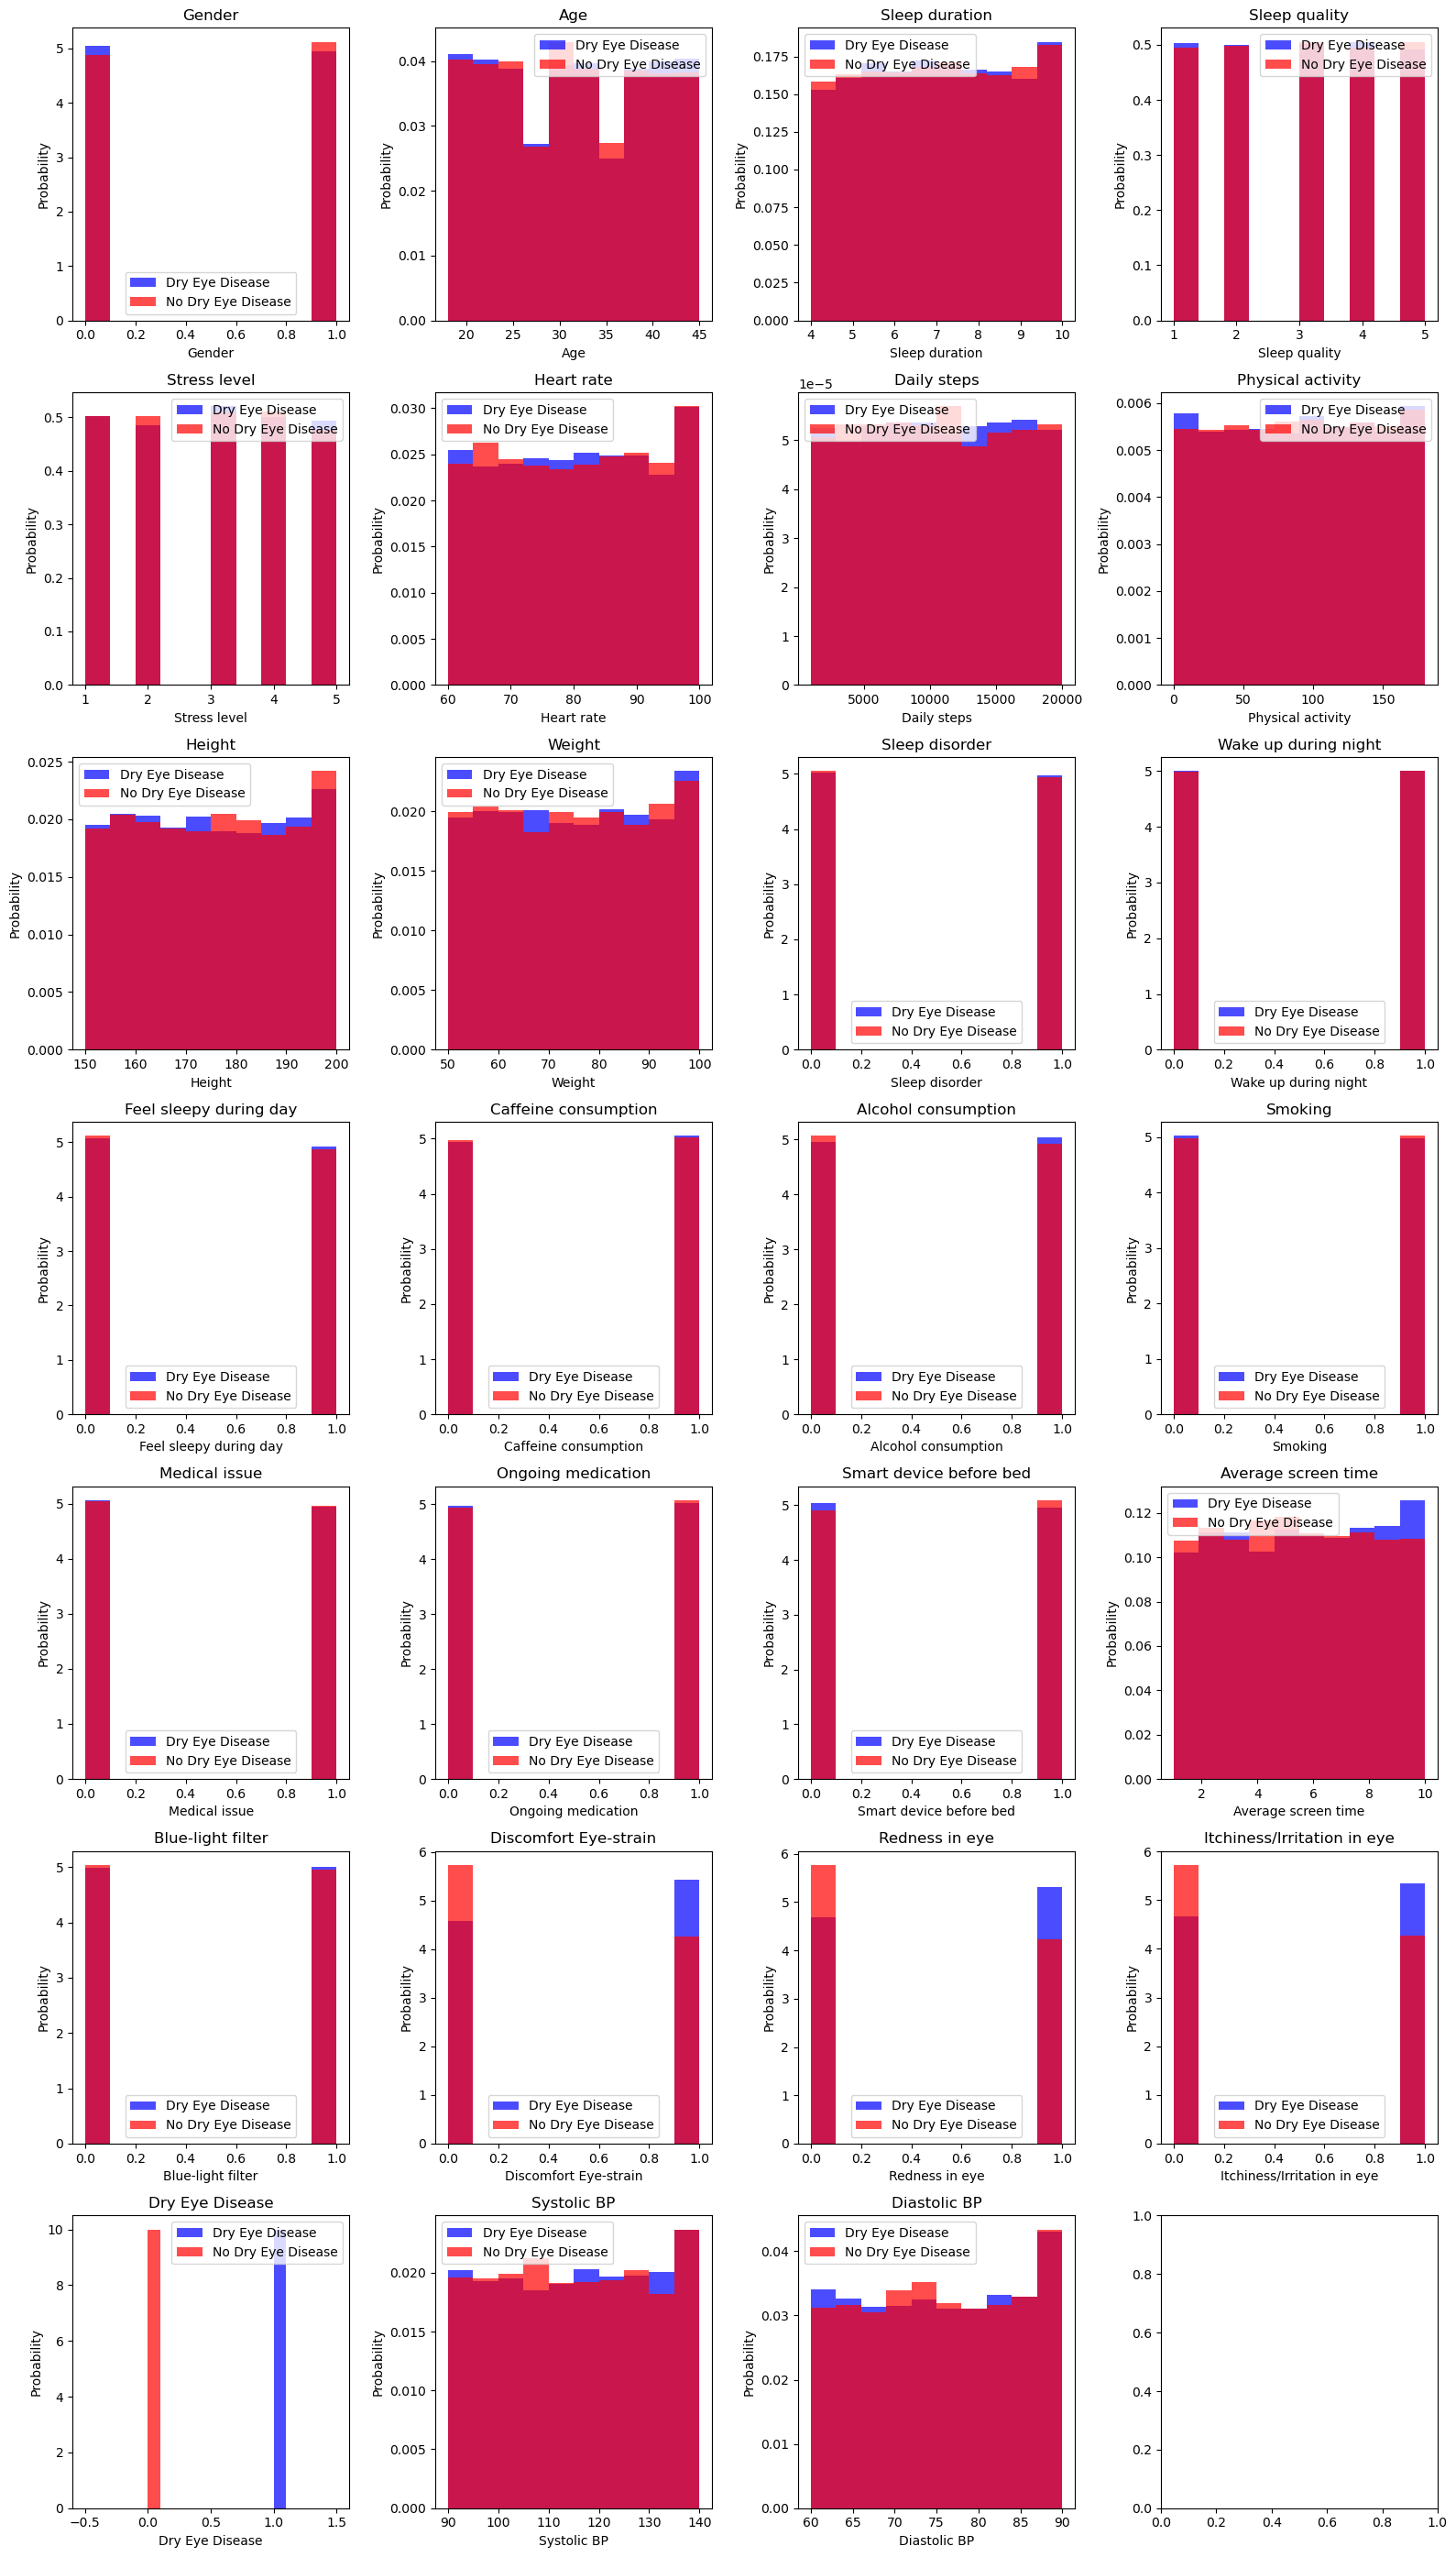

In [368]:
cols = 4
rows = (len(df.columns) + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
axes = axes.flatten()

for i, label in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[df["Dry Eye Disease"] == 1][label], color='blue', alpha=0.7, density=True, label='Dry Eye Disease')
    ax.hist(df[df["Dry Eye Disease"] == 0][label], color='red', alpha=0.7, density=True, label='No Dry Eye Disease')

    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel('Probability')
    ax.legend()

plt.tight_layout()
plt.show()

## Train, validation, test datasets

In [369]:
df = df.sample(frac=1, random_state=42)
train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))

train = df.iloc[:train_end]
valid = df.iloc[train_end:valid_end]
test = df.iloc[valid_end:]

In [370]:
 def scale_dataset(df, oversample=False):
     X = df.drop(columns=["Dry Eye Disease"])
     y = df["Dry Eye Disease"]
     
     scaler = StandardScaler()
     X = scaler.fit_transform(X)
     
     if oversample:
         ros = RandomOverSampler()
         X, y = ros.fit_resample(X, y)
     
     data = np.hstack((X, np.reshape(y, (-1, 1))))
     
     return data, X, y

In [371]:
print(len(train[train['Dry Eye Disease']==0]))
print(len(train[train['Dry Eye Disease']==1]))

4149
7851


In [372]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [373]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

15702
7851
7851


# Dry Eye Disease Classification
## kNN

In [374]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [375]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [376]:
y_pred = knn_model.predict(X_test)

In [377]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.49      0.43      1439
           1       0.66      0.56      0.60      2561

    accuracy                           0.53      4000
   macro avg       0.52      0.52      0.52      4000
weighted avg       0.56      0.53      0.54      4000



## Naive Bayes

In [378]:
from sklearn.naive_bayes import GaussianNB

In [379]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [380]:
y_pred = nb_model.predict(X_test)

In [381]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.56      0.47      1439
           1       0.69      0.54      0.60      2561

    accuracy                           0.55      4000
   macro avg       0.55      0.55      0.54      4000
weighted avg       0.58      0.55      0.56      4000



## Logistic Regression

In [382]:
from sklearn.linear_model import LogisticRegression

In [383]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [384]:
y_pred = lg_model.predict(X_test)

In [385]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.56      0.47      1439
           1       0.68      0.54      0.60      2561

    accuracy                           0.54      4000
   macro avg       0.54      0.55      0.53      4000
weighted avg       0.58      0.54      0.55      4000



## SVM

In [386]:
from sklearn.svm import SVC

In [387]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [388]:
y_pred = svm_model.predict(X_test)

In [389]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.42      0.45      1439
           1       0.70      0.75      0.72      2561

    accuracy                           0.63      4000
   macro avg       0.59      0.58      0.58      4000
weighted avg       0.62      0.63      0.62      4000



## Random Forest

In [391]:
from sklearn.ensemble import RandomForestClassifier

In [392]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [393]:
y_pred = rf_model.predict(X_test)

In [394]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.27      0.38      1439
           1       0.69      0.92      0.79      2561

    accuracy                           0.68      4000
   macro avg       0.67      0.59      0.58      4000
weighted avg       0.68      0.68      0.64      4000



## Decision Tree


In [395]:
from sklearn.tree import DecisionTreeClassifier

In [396]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [397]:
y_pred = dt_model.predict(X_test)

In [398]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.40      0.40      1439
           1       0.67      0.68      0.67      2561

    accuracy                           0.58      4000
   macro avg       0.54      0.54      0.54      4000
weighted avg       0.57      0.58      0.57      4000

